In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [28]:
%matplotlib inline

# Read the dataset and understand the features and target variable

In [29]:
data=pd.read_csv("Qualitative_Bankruptcy.data.txt",names=['Industrial Risk','Management Risk','Financial Flexibility',
                                                         'Credibility','Competitiveness','Operating Risk','Class'])
data

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB
...,...,...,...,...,...,...,...
245,N,N,A,N,N,N,B
246,P,N,N,N,N,N,B
247,A,N,N,N,N,N,B
248,N,N,N,N,N,N,B


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Industrial Risk        250 non-null    object
 1   Management Risk        250 non-null    object
 2   Financial Flexibility  250 non-null    object
 3   Credibility            250 non-null    object
 4   Competitiveness        250 non-null    object
 5   Operating Risk         250 non-null    object
 6   Class                  250 non-null    object
dtypes: object(7)
memory usage: 13.8+ KB


In [31]:
data.describe()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
count,250,250,250,250,250,250,250
unique,3,3,3,3,3,3,2
top,N,N,N,N,N,N,NB
freq,89,119,119,94,103,114,143


In [32]:
features=data.drop(columns="Class")

In [33]:
features

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,P,P,A,A,A,P
1,N,N,A,A,A,N
2,A,A,A,A,A,A
3,P,P,P,P,P,P
4,N,N,P,P,P,N
...,...,...,...,...,...,...
245,N,N,A,N,N,N
246,P,N,N,N,N,N
247,A,N,N,N,N,N
248,N,N,N,N,N,N


In [34]:
target=data.pop("Class")
target

0      NB
1      NB
2      NB
3      NB
4      NB
       ..
245     B
246     B
247     B
248     B
249     B
Name: Class, Length: 250, dtype: object

# Encode features

In [35]:
class_encoding={"B":1,"NB":0}
target=target.map(class_encoding)
target

0      0
1      0
2      0
3      0
4      0
      ..
245    1
246    1
247    1
248    1
249    1
Name: Class, Length: 250, dtype: int64

In [37]:
risk_encoding={"N":-1,"A":0,"P":1}

In [38]:
for column in features.columns:
    features[column]=features[column].map(risk_encoding)

In [39]:
features

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,1,1,0,0,0,1
1,-1,-1,0,0,0,-1
2,0,0,0,0,0,0
3,1,1,1,1,1,1
4,-1,-1,1,1,1,-1
...,...,...,...,...,...,...
245,-1,-1,0,-1,-1,-1
246,1,-1,-1,-1,-1,-1
247,0,-1,-1,-1,-1,-1
248,-1,-1,-1,-1,-1,-1


In [40]:
corr=features.corr()
corr

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
Industrial Risk,1.000000,0.255127,0.162624,0.014438,0.257814,0.144507
Management Risk,0.255127,1.000000,0.254845,0.303341,0.306568,0.213874
Financial Flexibility,0.162624,0.254845,1.000000,0.524951,0.686612,0.116903
Credibility,0.014438,0.303341,0.524951,1.000000,0.675689,0.288458
Competitiveness,0.257814,0.306568,0.686612,0.675689,1.000000,0.211383
Operating Risk,0.144507,0.213874,0.116903,0.288458,0.211383,1.000000


<IPython.core.display.Javascript object>

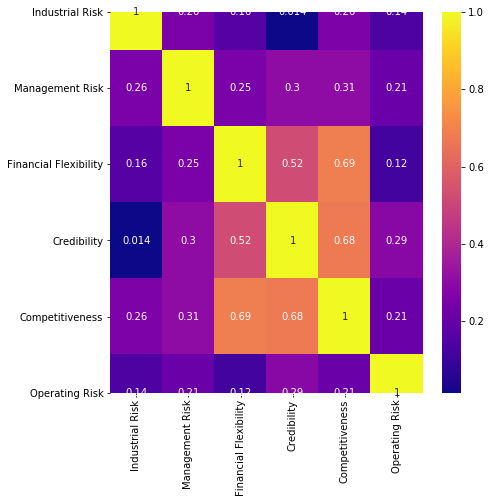

In [41]:
plt.figure(figsize=(7,7))
sns.heatmap(corr,annot=True,cmap='plasma')

# Distribution of target column and independent features

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

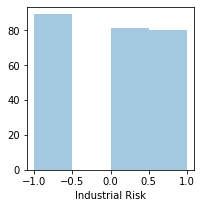

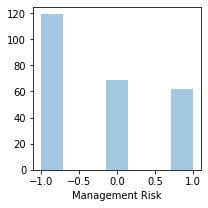

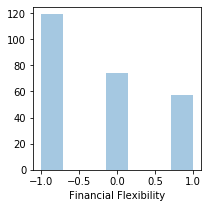

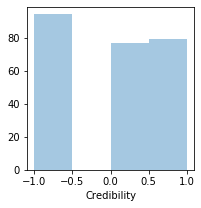

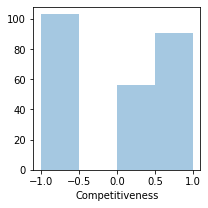

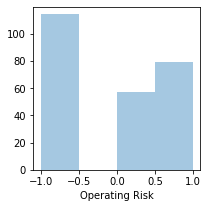

In [42]:
for column in features.columns:
    plt.figure(figsize=(3,3))
    sns.distplot(features[column],kde=False,)
    plt.plot()

All the feature distribution plot shows the number of negative risk("N") is higher.

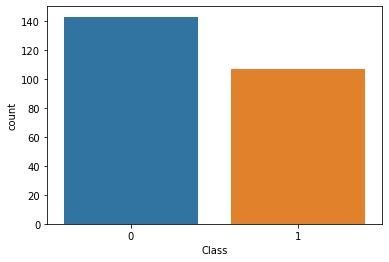

In [43]:
sns.countplot(target)

In the given data set, the number of bankruptcy is lower. The given data set has a slight class imbalance for the target column

In [44]:
df=features.join(target)
df

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,1,1,0,0,0,1,0
1,-1,-1,0,0,0,-1,0
2,0,0,0,0,0,0,0
3,1,1,1,1,1,1,0
4,-1,-1,1,1,1,-1,0
...,...,...,...,...,...,...,...
245,-1,-1,0,-1,-1,-1,1
246,1,-1,-1,-1,-1,-1,1
247,0,-1,-1,-1,-1,-1,1
248,-1,-1,-1,-1,-1,-1,1


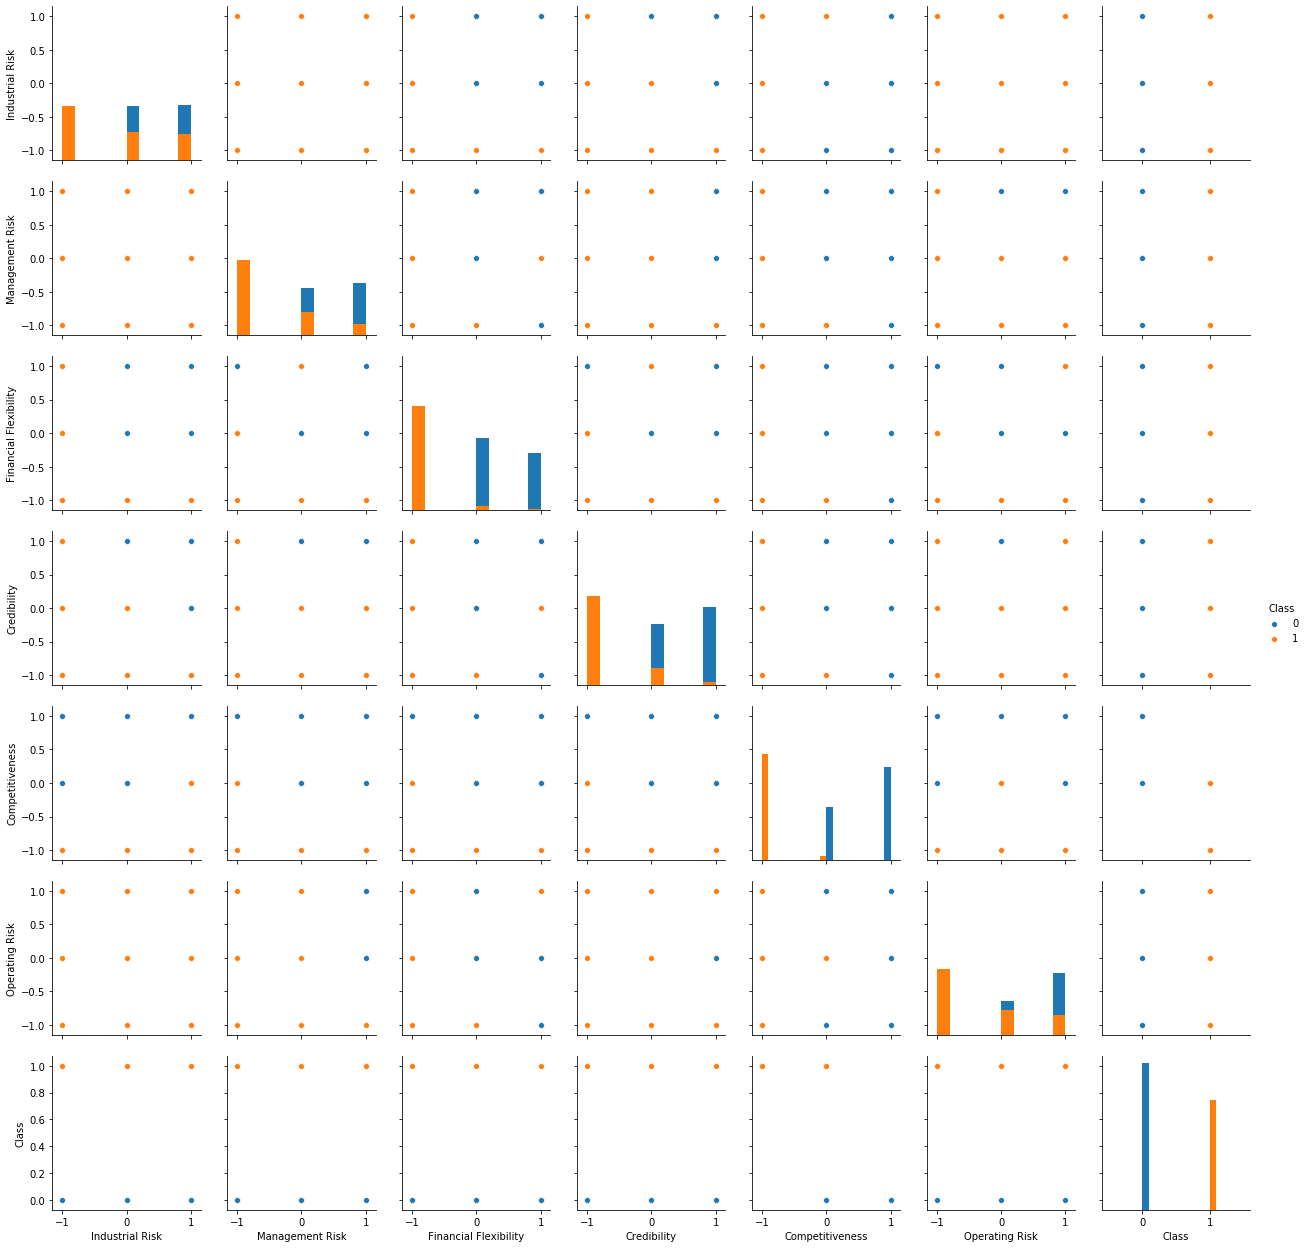

In [45]:
sns.pairplot(df,hue="Class",diag_kind="hist")

COMMENT: Clearly,as expected, from the pairplot Negative Risk("N" or "-1") is classified as Bankrupt. Whereas Positive Risk("P" or "1") is safer as compared to Average Risk("A" or "0")

# Separate the dependent variable (class) from the data.

In [46]:
X=df.drop(columns="Class")
X

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,1,1,0,0,0,1
1,-1,-1,0,0,0,-1
2,0,0,0,0,0,0
3,1,1,1,1,1,1
4,-1,-1,1,1,1,-1
...,...,...,...,...,...,...
245,-1,-1,0,-1,-1,-1
246,1,-1,-1,-1,-1,-1
247,0,-1,-1,-1,-1,-1
248,-1,-1,-1,-1,-1,-1


In [47]:
Y=df["Class"]
Y

0      0
1      0
2      0
3      0
4      0
      ..
245    1
246    1
247    1
248    1
249    1
Name: Class, Length: 250, dtype: int64

In [55]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [60]:
n=range(1,10)
wss =[] 
for clusters in n:
    kmeans=KMeans(clusters)
    model=kmeans.fit(X)
    wss.append(kmeans.inertia_)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Sum of Squares')

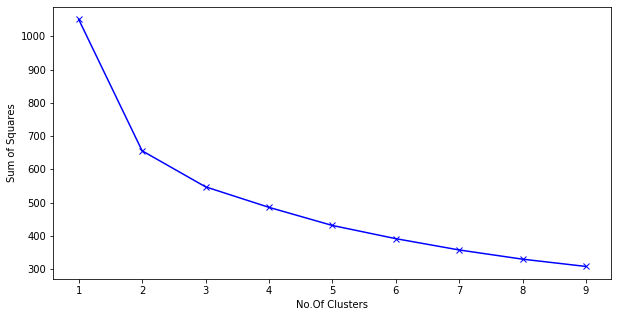

In [61]:
plt.figure(figsize=(10, 5))
plt.plot(n,wss,'bx-')
plt.xlabel("No.Of Clusters")
plt.ylabel('Sum of Squares')

COMMENT: At K=2, there is a sharp bend(Elbow). Hence choose K=2.

In [62]:
kmeans=KMeans(n_clusters=2)
model=kmeans.fit(X)

In [63]:
model.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [64]:
pred=model.predict(X)
pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

#Comparing with Target/Label of Original Dataset

In [66]:
score=accuracy_score(pred,Y)
score

0.988

Adding Model Predicted labels to the Dataset

In [67]:
new_df=pd.DataFrame()
new_df["Group"]=model.labels_
new_df=X.join(new_df)
new_df

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Group
0,1,1,0,0,0,1,0
1,-1,-1,0,0,0,-1,1
2,0,0,0,0,0,0,0
3,1,1,1,1,1,1,0
4,-1,-1,1,1,1,-1,0
...,...,...,...,...,...,...,...
245,-1,-1,0,-1,-1,-1,1
246,1,-1,-1,-1,-1,-1,1
247,0,-1,-1,-1,-1,-1,1
248,-1,-1,-1,-1,-1,-1,1


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(new_df.drop(columns="Group"),new_df["Group"],test_size=0.30,random_state=0)

In [69]:
from sklearn.svm import SVC
svc=SVC()
model=svc.fit(X_train,y_train)

In [71]:
predict=model.predict(X_train)
predict

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1])

In [72]:
score=accuracy_score(predict,y_train)
score

0.9885714285714285

In [73]:
predict=model.predict(X_test)
predict

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1])

In [74]:
score=accuracy_score(predict,y_test)
score

1.0

In [75]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(predict,y_test)

array([[40,  0],
       [ 0, 35]], dtype=int64)

In [76]:
f1_score(predict,y_test)

1.0